In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
# print(mouse_df)

clinical_df = pd.read_csv(clinical_trial_data_to_load)
# print(clinical_df)

# Drop any duplicate values
mouse_df.drop_duplicates(subset='Mouse ID', keep='first', inplace=True)


In [2]:
# Combine the data into a single dataset
combined_df = pd.merge(left=clinical_df, right=mouse_df, how='left', left_on='Mouse ID', right_on='Mouse ID')


# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
# My Variables
drug_list = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
drug_use = ["Capomulin","Infubinol","Ketapril","Placebo"]
drug_ignore = ["Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"]

drug_x_axis = np.arange(len(drug_use))
drug_x_axis

time_x_axis = combined_df["Timepoint"].unique()
time_x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_response_df = pd.DataFrame(combined_df.groupby(['Drug', 'Timepoint']).mean())
# Convert to DataFrame
tumor_response_df = tumor_response_df.drop(columns=['Metastatic Sites'])
tumor_response_df = tumor_response_df.reset_index()
# Preview DataFrame


tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# combined_df

tumor_sem_df = pd.DataFrame(combined_df.groupby(['Drug', 'Timepoint']).sem())
# Convert to DataFrame
tumor_sem_df = tumor_sem_df.drop(columns=['Metastatic Sites'])
tumor_sem_df = tumor_sem_df.drop(columns=['Mouse ID'])
tumor_sem_df = tumor_sem_df.reset_index()
# Preview DataFrame

tumor_sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_mung_df = tumor_response_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_sem_mung_df = tumor_sem_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked

tumor_response_mung_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,54.067395,53.170334


In [7]:
tumor_sem_mung_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.621889,0.533182


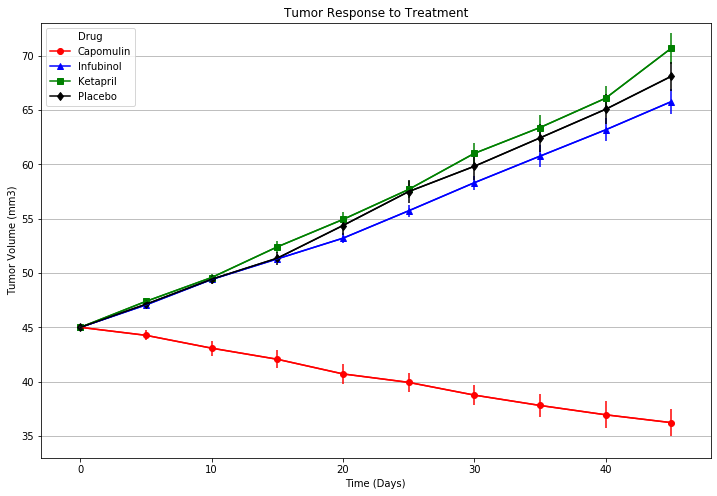

In [8]:
# Generate the Plot (with Error Bars)

tumor_response_condensed = tumor_response_mung_df.drop(columns=drug_ignore)
tumor_err_condensed = tumor_sem_mung_df.drop(columns=drug_ignore)


# tumor_err_plot.hlines(0, 0, 10, alpha=0.25)
# tumor_err_plot.grid(axis='y')

tumor_err_plot = tumor_response_condensed.plot(figsize=(12,8), yerr=tumor_err_condensed, color=['r','b','g','k'], legend=False)

tumor_err_plot.set_prop_cycle(None)
tumor_err_plot = tumor_response_condensed.plot(figsize=(12,8), style=['-or', '-^b', '-sg', '-dk'], ax=tumor_err_plot)

tumor_err_plot.set_xlabel("Time (Days)")
tumor_err_plot.set_ylabel("Tumor Volume (mm3)")
tumor_err_plot.set_title("Tumor Response to Treatment")
tumor_err_plot.set_ylim(33, 73)
tumor_err_plot.set_xlim(-3,48)
tumor_err_plot.grid('on', axis='y')

plt.show()
# 
# Save the Figure
fig = tumor_err_plot.get_figure()
fig.savefig("Images/Tumor_Means.png")


In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response_df = pd.DataFrame(combined_df.groupby(['Drug', 'Timepoint']).mean())
# Convert to DataFrame
meta_response_df = meta_response_df.drop(columns=['Tumor Volume (mm3)'])
meta_response_df = meta_response_df.reset_index()
# Preview DataFrame
meta_response_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

meta_sem_df = pd.DataFrame(combined_df.groupby(['Drug', 'Timepoint']).sem())
# Convert to DataFrame
meta_sem_df = meta_sem_df.drop(columns=['Tumor Volume (mm3)'])
meta_sem_df = meta_sem_df.drop(columns=['Mouse ID'])
meta_sem_df = meta_sem_df.reset_index()
# Preview DataFrame

meta_sem_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames

meta_response_mung_df = meta_response_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
meta_sem_mung_df = meta_sem_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked

meta_response_mung_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
meta_sem_mung_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.200905,0.166378


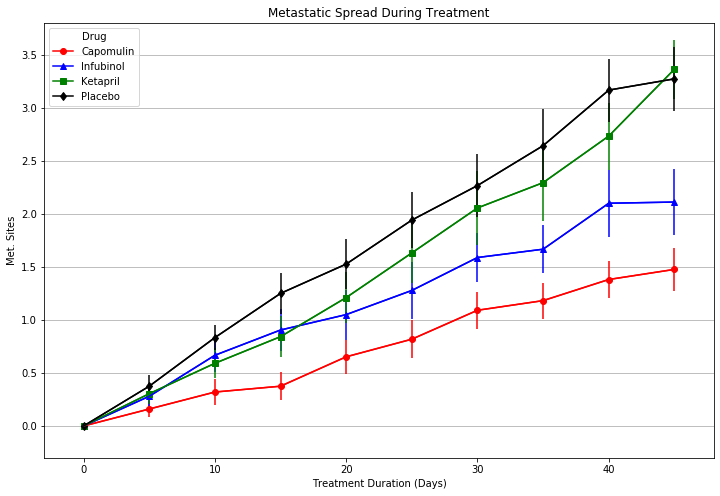

In [14]:
# Generate the Plot (with Error Bars)
meta_response_condensed = meta_response_mung_df.drop(columns=drug_ignore)
meta_err_condensed = meta_sem_mung_df.drop(columns=drug_ignore)


meta_err_plot = meta_response_condensed.plot(figsize=(12,8), yerr=meta_err_condensed, color=['r','b','g','k'], legend=False)
meta_err_plot.set_prop_cycle(None)
meta_err_plot = meta_response_condensed.plot(figsize=(12,8), style=['-or', '-^b', '-sg', '-dk'], ax=meta_err_plot)

meta_err_plot.set_xlabel("Treatment Duration (Days)")
meta_err_plot.set_ylabel("Met. Sites")
meta_err_plot.set_title("Metastatic Spread During Treatment")
meta_err_plot.set_ylim(-.3, 3.8)
meta_err_plot.set_xlim(-3,48)
meta_err_plot.grid('on', axis='y')


plt.show()
# 
# Save the Figure
fig = meta_err_plot.get_figure()
fig.savefig("Images/Tumor_Means.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survive_df = pd.DataFrame(combined_df.groupby(['Drug', 'Timepoint']).count())

survive_df = survive_df.drop(columns=['Metastatic Sites', 'Tumor Volume (mm3)'])
# Convert to DataFrame
survive_df = survive_df.rename(columns={
    "Mouse ID" : "Mouse Count"
})
survive_df = survive_df.reset_index()
# Preview DataFrame
survive_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames

survive_mung_df = survive_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")
# Preview the Data Frame
survive_mung_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,26,25
5,25,21,25,23,23,24,23,25,25,24
10,25,20,21,22,21,24,21,24,23,22
15,24,19,21,19,21,20,15,24,23,21
20,23,18,20,19,20,19,15,23,21,17


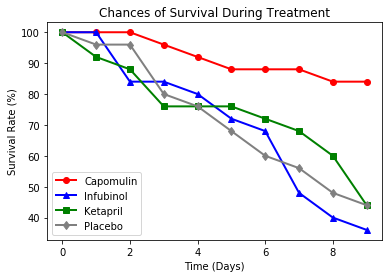

In [17]:
# Generate the Plot (Accounting for percentages)
sur_cap = 100*survive_mung_df['Capomulin']/survive_mung_df['Capomulin'].max()
sur_cet = 100*survive_mung_df['Ceftamin']/survive_mung_df['Ceftamin'].max()
sur_inf = 100*survive_mung_df['Infubinol']/survive_mung_df['Infubinol'].max()
sur_ket = 100*survive_mung_df['Ketapril']/survive_mung_df['Ketapril'].max()
sur_naf = 100*survive_mung_df['Naftisol']/survive_mung_df['Naftisol'].max()
sur_pla = 100*survive_mung_df['Placebo']/survive_mung_df['Placebo'].max()
sur_pro = 100*survive_mung_df['Propriva']/survive_mung_df['Propriva'].max()
sur_ram = 100*survive_mung_df['Ramicane']/survive_mung_df['Ramicane'].max()
sur_ste = 100*survive_mung_df['Stelasyn']/survive_mung_df['Stelasyn'].max()
sur_zon = 100*survive_mung_df['Zoniferol']/survive_mung_df['Zoniferol'].max()

# Save the Figure
x_axis = np.arange(len(sur_cap))
x_axis

plt.plot(x_axis, sur_cap, linewidth=2, marker="o", color="red", label = "Capomulin")
plt.plot(x_axis, sur_inf, linewidth=2, marker="^", color="blue", label = "Infubinol")
plt.plot(x_axis, sur_ket, linewidth=2, marker="s", color="green", label = "Ketapril")
plt.plot(x_axis, sur_pla, linewidth=2, marker="d", color="gray", label = "Placebo")

plt.legend()

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Chances of Survival During Treatment")
plt.savefig("Images/Survival Chances.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
tumorStart = tumor_response_mung_df.iloc[0,:].to_list()

tumorEnd = tumor_response_mung_df.iloc[9,:].to_list()
tumor_summary=pd.DataFrame({
    "Drug" : drug_list,
    "Tumor Size @ Start" : tumorStart,
    "Tumor Size @ End" : tumorEnd
})
tumor_summary["Percent Change"] = 100*(tumor_summary["Tumor Size @ End"] - tumor_summary["Tumor Size @ Start"])/tumor_summary["Tumor Size @ Start"]


# Display the data to confirm
tumor_summary


,Drug,Tumor Size @ Start,Tumor Size @ End,Percent Change
0,Capomulin,45.0,36.236114,-19.475303
1,Ceftamin,45.0,64.132421,42.516492
2,Infubinol,45.0,65.755562,46.123472
3,Ketapril,45.0,70.662958,57.028795
4,Naftisol,45.0,69.265506,53.923347
5,Placebo,45.0,68.084082,51.297960
6,Propriva,45.0,66.258529,47.241175
7,Ramicane,45.0,34.955595,-22.320900
8,Stelasyn,45.0,68.438310,52.085134
9,Zoniferol,45.0,65.960888,46.579751


           Tumor Size @ Start  Tumor Size @ End  Percent Change
Drug                                                           
Ceftamin                 45.0         64.132421       42.516492
Infubinol                45.0         65.755562       46.123472
Ketapril                 45.0         70.662958       57.028795
Naftisol                 45.0         69.265506       53.923347
Placebo                  45.0         68.084082       51.297960
           Tumor Size @ Start  Tumor Size @ End  Percent Change
Drug                                                           
Capomulin                45.0         36.236114      -19.475303
Ramicane                 45.0         34.955595      -22.320900


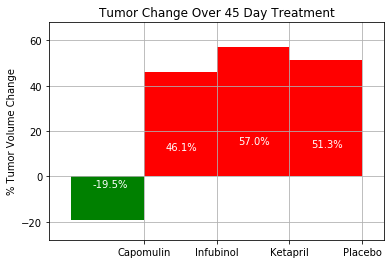

<Figure size 432x288 with 0 Axes>

In [19]:
# Store all Relevant Percent Changes into a Tuple
tumor_condensed_summ = tumor_summary#.drop(drug_ignore)
tumor_condensed_summ = tumor_condensed_summ.set_index('Drug')


# Splice the data between passing and failing drugs
failing_drugs = tumor_condensed_summ.loc[tumor_condensed_summ['Percent Change'] >= 0]
print(failing_drugs.head())

passing_drugs = tumor_condensed_summ.loc[tumor_condensed_summ['Percent Change'] < 0]
print(passing_drugs.head())


tumor_bar = tumor_condensed_summ.drop(drug_ignore)
tumor_bar = tumor_bar.drop(columns=['Tumor Size @ Start', 'Tumor Size @ End'])
# tumor_bar = tumor_bar.sort_values(by=['Percent Change'])
# print(tumor_bar)


x2_axis = x_axis+1
drug_bar = ["Capomulin","Infubinol","Ketapril","Placebo"]



ax = tumor_bar.plot(kind='bar', color=['grrr'], width = 1, align='edge', rot=0, legend=False)

# Orient widths. Add labels, tick marks, etc. 
ax.set_xticks(x2_axis)
ax.set_xticklabels(drug_use, ha='center')
ax.set_xlim(-.3,4.3)
ax.set_ylim(-28,68)
ax.grid(which='major')


# Use functions to label the percentages of changes
def percent(ax, labels):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 - 0.2
        y = p.get_y() + p.get_height()/4
        ax.annotate(percentage, (x, y), color='w')
# Call functions to implement the function calls
percent(ax, tumor_bar['Percent Change'].to_list())

# Save the Figure


ax.set_ylabel("% Tumor Volume Change")
ax.set_xlabel("")
ax.set_title("Tumor Change Over 45 Day Treatment")


plt.show()
plt.savefig("Images/Final Analysis.png")
# Show the Figure
#fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [20]:
tumor_condensed_summ2 = tumor_condensed_summ.drop(columns=['Tumor Size @ Start', 'Tumor Size @ End'])

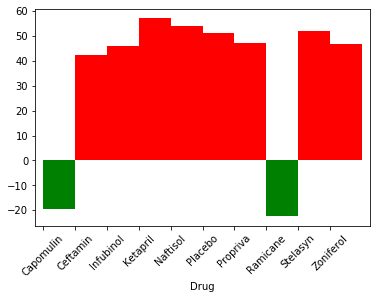

In [27]:
ax2 = tumor_condensed_summ2.plot(kind='bar', color=['grrrrrrgrr'], width = 1, align='edge', rot=45, legend=False)
x3_axis = np.arange(len(drug_list))
ax2.set_xticks(x3_axis)
ax2.set_xticklabels(drug_list, ha='center')
plt.show()
